In [1]:
from KNN import KNN
from utility import *

from sklearn.model_selection import train_test_split
import gc

In [2]:
X=pd.read_csv('dataset/X_dropped.csv')
y=pd.read_csv('dataset/y_dropped.csv')

train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=5000,train_size=30000,random_state=42)

del X,y
gc.collect()

0

K-Nearest-Neighbors

In [3]:
model=KNN()

properties={'k':[2,3,4,5,6,7]}

In [12]:
model_name='KNN'

if 'model' in globals():
    
    best_model,result=model_selector(model,properties,train_X,train_y,n_jobs=-1)
    save(best_model,result,model_name)
    
else:
    from KNN import KNN
    from utility import *

    from sklearn.model_selection import train_test_split
    import gc
    
    X=pd.read_csv('dataset/X_dropped.csv')
    y=pd.read_csv('dataset/y_dropped.csv')

    train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=5000,train_size=30000,random_state=42)

    del X,y
    gc.collect()
    
    best_model,result=load(model_name)

In [13]:
result[["param_k","mean_test_score"]]

,param_k,mean_test_score
0,2,0.965367
1,5,0.965533
2,10,0.961333
3,20,0.953433
4,30,0.947833
5,50,0.938500
6,60,0.935633
7,70,0.931933
8,80,0.929100
9,90,0.926433


In [14]:
best_model.fit(train_X,train_y)

KNN()

In [15]:
pred_y=best_model.predict(test_X)

In [16]:
accuracy_score(test_y,pred_y)

0.9608

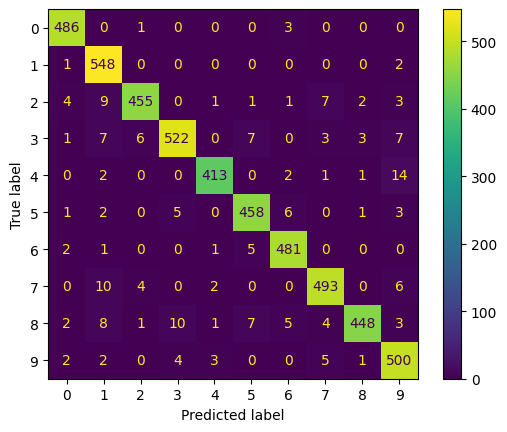

In [17]:
plot_confusion_matrix(test_y,pred_y)